In [256]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [257]:
import pandas as pd 
import numpy as np 

covid_data = pd.read_csv("covid.csv", parse_dates=["date"])

covid_data.head(10)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


In [258]:
covid_data.describe()

,fips,cases,deaths
count,2.479154e+06,2.502832e+06,2.445227e+06
mean,3.139958e+04,1.003380e+04,1.616100e+02
std,1.634251e+04,4.752522e+04,8.203335e+02
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.902300e+04,3.820000e+02,6.000000e+00
50%,3.001100e+04,1.773000e+03,3.300000e+01
75%,4.611100e+04,5.884000e+03,1.010000e+02
max,7.803000e+04,2.908425e+06,4.026700e+04


In [266]:
covid_data[["state", "county"]][covid_data.deaths==covid_data["deaths"].max()]

,state,county
date,,
2022-05-13,New York,New York City


In [267]:
covid_data.reset_index("date", inplace=True )
covid_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [268]:
covid_data.set_index("date", inplace=True)
covid_data.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [269]:
# Missing data fill_na 

covid_data.isnull().sum()

county        0
state         0
fips      23678
cases         0
deaths    57605
dtype: int64

In [270]:
new_data=covid_data.fillna({"fips": 0.0000, "deaths": 0})

In [271]:
new_data.fillna(method="ffill").isnull().sum()## Carry on previous value 


county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [272]:
covid_data.interpolate(method="time")

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...
2022-05-13,Sweetwater,Wyoming,56037.0,11088,126.0
2022-05-13,Teton,Wyoming,56039.0,10074,16.0
2022-05-13,Uinta,Wyoming,56041.0,5643,39.0


In [273]:
#delete missing value 

covid_data.dropna()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...
2022-05-13,Sweetwater,Wyoming,56037.0,11088,126.0
2022-05-13,Teton,Wyoming,56039.0,10074,16.0
2022-05-13,Uinta,Wyoming,56041.0,5643,39.0


In [274]:
covid_data.dropna().isnull().sum()

county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [275]:
covid_data.tail()

,county,state,fips,cases,deaths
date,,,,,
2022-05-13,Sweetwater,Wyoming,56037.0,11088,126.0
2022-05-13,Teton,Wyoming,56039.0,10074,16.0
2022-05-13,Uinta,Wyoming,56041.0,5643,39.0
2022-05-13,Washakie,Wyoming,56043.0,2358,44.0
2022-05-13,Weston,Wyoming,56045.0,1588,18.0


In [276]:
# Data Cleaning with replace function 
import numpy as np 
cat =pd.read_csv("catalog.csv")

cat.head(10)



,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN
5,64,4/20/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,0.23715,...,"(37.481400000000001, -82.518600000000006)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Applalachain news-express,http://www.news-expressky.com/articles/2007/04...
6,67,4/24/07,NaN,NaN,United States,US,South Dakota,2540,Dakota Dunes,2.48033,...,"(42.494100000000003, -96.457599999999999)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Sioux City Journnal,http://www.siouxcityjournal.com/articles/2007/...
7,77,5/21/07,NaN,SA,Colombia,CO,Risaralda,440118,Pereira,0.62022,...,"(4.8080999999999996, -75.694100000000006)",Landslide,Mudslide,Large,Rain,NaN,NaN,13.0,Reuters - AlertNet.org,http://www.reuters.com/news/video/videoStory?v...
8,105,6/27/07,NaN,SA,Ecuador,EC,Zamora-Chinchipe,15276,Zamora,0.47714,...,"(-4.0650000000000004, -78.950999999999993)",Landslide,Landslide,Medium,Downpour,NaN,NaN,NaN,Red Cross - Field reports,https://www-secure.ifrc.org/dmis/prepare/view_...
9,106,6/27/07,NaN,SA,Ecuador,EC,Loja,117796,Loja,0.35649,...,"(-3.99, -79.204999999999998)",Landslide,Landslide,Medium,Downpour,NaN,NaN,NaN,Red Cross - Field reports,https://www-secure.ifrc.org/dmis/prepare/view_...


In [277]:

cat.describe()

,id,population,distance,latitude,longitude,injuries,fatalities
count,1693.000000,1.693000e+03,1692.000000,1692.000000,1692.000000,515.000000,1446.000000
mean,4145.027761,9.345940e+04,7.822695,27.715661,-86.883660,0.526214,1.459198
std,2236.741960,5.226016e+05,9.358256,14.206341,14.332811,3.427514,9.184653
min,34.000000,0.000000e+00,0.000030,-10.125800,-117.309200,0.000000,0.000000
25%,2330.000000,2.080000e+03,1.936360,14.085650,-92.646625,0.000000,0.000000
50%,4087.000000,5.785000e+03,4.538635,35.613200,-83.653000,0.000000,0.000000
75%,6098.000000,1.886700e+04,9.873865,39.546400,-78.851325,0.000000,0.000000
max,7541.000000,1.229419e+07,74.460970,45.425700,-45.601000,45.000000,280.000000


In [278]:
cat.shape

(1693, 23)

In [239]:
cat.isnull().sum()

id                         0
date                       3
time                    1064
continent_code          1529
country_name               0
country_code               0
state/province             1
population                 0
city/town                  4
distance                   1
location_description    1142
latitude                   1
longitude                  1
geolocation                1
hazard_type                0
landslide_type             1
landslide_size             1
trigger                    2
storm_name              1561
injuries                1178
fatalities               247
source_name              821
source_link              100
dtype: int64

In [250]:
cat["injuries"].dtype

dtype('float64')

In [254]:
catnew=cat.fillna({"injuries": 0, "fatalities": 0, 'storm_name': " ", "time": " Day" , "source_link": " ", "location":" "}).drop(["continent_code"], axis=1)

In [255]:
catnew.head()

,id,date,time,country_name,country_code,state/province,population,city/town,distance,location_description,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,,0.0,0.0,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,Day,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,,0.0,0.0,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,Day,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,,0.0,0.0,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,Day,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,,0.0,0.0,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,Day,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,,0.0,0.0,Matthew Crawford (KGS),


In [248]:
catnew.groupby("continent_code")["injuries"].sum()

continent_code
SA    125.0
Name: injuries, dtype: float64

<AxesSubplot:xlabel='trigger'>

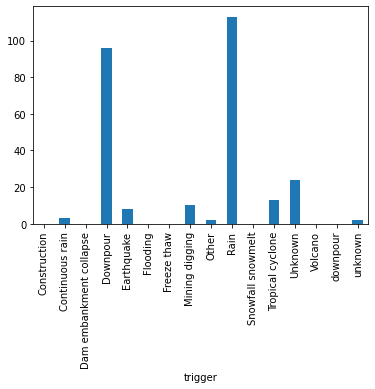

In [289]:
import matplotlib.pyplot as plt 
catnew.groupby("trigger")["injuries"].sum().plot.bar()

In [288]:
pd.crosstab(catnew["trigger"], catnew["landslide_type"])

landslide_type,Complex,Creep,Debris flow,Lahar,Landslide,Mudslide,Other,Riverbank collapse,Rockfall,Rockslide,Snow avalanche,Unknown,landslide,mudslide
trigger,,,,,,,,,,,,,,
Construction,0,0,0,0,3,1,1,0,0,0,0,0,0,0
Continuous rain,1,1,0,0,59,28,1,0,2,0,0,0,1,2
Dam embankment collapse,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Downpour,26,3,26,1,415,371,1,0,22,0,0,0,0,1
Earthquake,0,0,0,0,3,0,0,0,5,0,0,0,0,0
Flooding,0,0,0,0,6,2,0,2,0,0,0,0,0,0
Freeze thaw,1,0,0,0,0,1,0,0,4,0,0,0,0,0
Mining digging,0,0,0,0,6,0,0,0,1,0,0,0,0,0
Other,0,0,0,0,2,0,0,0,0,0,1,0,0,0


In [290]:
# Writing Sql in pandas and writing sql first intall pymysql and sqlachemy 

!pip install pyMySQL





     |████████████████████████████████| 44 kB 4.7 MB/s eta 0:00:011


In [292]:
!pip install sqlalchemy  

In [293]:
import sqlalchemy 

In [ ]:
pd.read_sql_table()### use for covid data project 
